In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Importing Datasets**

In [7]:
df_test = pd.read_csv('Dataset/test_ajusted.csv', index_col=0)
df_train = pd.read_csv('Dataset/train_ajusted.csv', index_col=0)
df_test_Satisfaction = pd.read_csv('Dataset/test_Satisfaction.csv', index_col=0)
df_train_Satisfaction = pd.read_csv('Dataset/train_Satisfaction.csv', index_col=0)

df_test = pd.DataFrame(df_test)
df_train = pd.DataFrame(df_train)
df_test_Satisfaction = pd.DataFrame(df_test_Satisfaction)
df_train_Satisfaction = pd.DataFrame(df_train_Satisfaction)

df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,0.0,0.076923,0.0,0.0,0.086632,0.6,0.8,0.6,0.2,...,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364
1,0.0,1.0,0.230769,1.0,1.0,0.041195,0.6,0.4,0.6,0.6,...,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788
2,0.0,0.0,0.243590,1.0,1.0,0.224354,0.4,0.4,0.4,0.4,...,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000
3,0.0,0.0,0.230769,1.0,1.0,0.107229,0.4,1.0,1.0,1.0,...,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682
4,0.0,0.0,0.692308,1.0,1.0,0.036955,0.6,0.6,0.6,0.6,...,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000


## **Creating Validation Data**

In [8]:
from sklearn.model_selection import train_test_split

X = df_train
Y = df_train_Satisfaction
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## **Training Model - SVM Poly 3º**

In [9]:
from sklearn.svm import SVC

SVC = SVC(kernel='poly', degree=3, gamma='auto')
SVC.fit(X_train, Y_train)
Result = SVC.predict(X_test)

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **Testing with Validation Data**

0.9160290650113084
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.90      0.93     12472
              satisfied       0.86      0.94      0.90      8309

               accuracy                           0.92     20781
              macro avg       0.91      0.92      0.91     20781
           weighted avg       0.92      0.92      0.92     20781



Text(113.92222222222219, 0.5, 'Predicted')

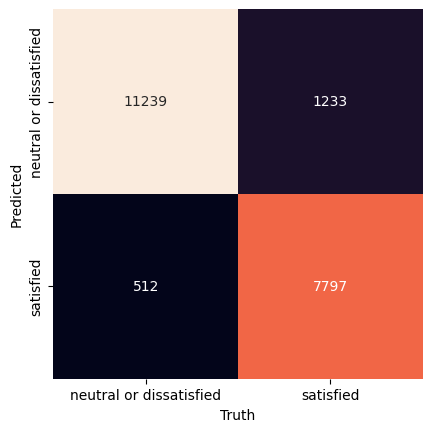

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

print(accuracy_score(Result, Y_test))
print(classification_report(Result, Y_test))

cm = confusion_matrix(Result, Y_test)
names = np.unique(Result)
sns.heatmap(cm, square= True, annot= True, fmt= 'd', cbar= False, xticklabels= names, yticklabels= names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

0.6325839236218047
                         precision    recall  f1-score   support

neutral or dissatisfied       1.00      0.60      0.75     24105
              satisfied       0.16      1.00      0.28      1871

               accuracy                           0.63     25976
              macro avg       0.58      0.80      0.52     25976
           weighted avg       0.94      0.63      0.72     25976



Text(113.92222222222219, 0.5, 'Predicted')

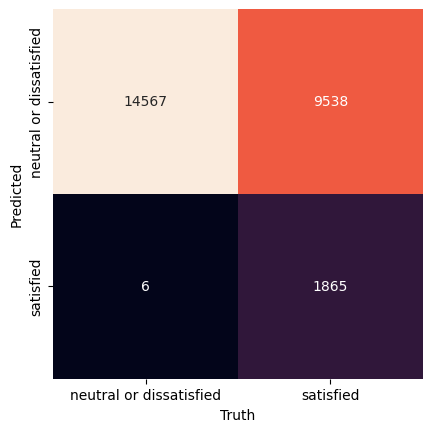

In [11]:
Result = SVC.predict(df_test)
print(accuracy_score(Result, df_test_Satisfaction))
print(classification_report(Result, df_test_Satisfaction))

cm = confusion_matrix(Result, df_test_Satisfaction)
names = np.unique(Result)
sns.heatmap(cm, square= True, annot= True, fmt= 'd', cbar= False, xticklabels= names, yticklabels= names)
plt.xlabel('Truth')
plt.ylabel('Predicted')